In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np

from scipy.signal import savgol_filter   # smooth the data

#plt.style.use('seaborn-white')
plt.style.use('seaborn-white')

## Reading Test data by URL from Aug 2nd

In [2]:
pdr1=pd.read_csv( "https://raw.githubusercontent.com/ClarksonAirlab/2019_sensor_workshop/master/Python/Tutorial/Tutorial%20Data/pdr_20190802.csv")
grimm1 = pd.read_csv("https://raw.githubusercontent.com/ClarksonAirlab/2019_sensor_workshop/master/Python/Tutorial/Tutorial%20Data/grimm_20190802.csv")
cpc1= pd.read_csv("https://raw.githubusercontent.com/ClarksonAirlab/2019_sensor_workshop/master/Python/Tutorial/Tutorial%20Data/CPC_20190802.csv")


In [3]:
pdr1.columns = ["pm2.5","Temp","RH","AP","Flag","Time","Date"]
pdr1.head()

,pm2.5,Temp,RH,AP,Flag,Time,Date
0,7.94,20.1,62,752,0,14:11:59,2-Aug-19
1,6.02,20.1,62,754,0,14:12:00,2-Aug-19
2,6.17,20.1,62,754,0,14:12:01,2-Aug-19
3,5.72,20.1,62,754,0,14:12:02,2-Aug-19
4,4.80,20.1,62,754,0,14:12:03,2-Aug-19


In [4]:
pdr1["Date"] = pd.to_datetime(pdr1["Date"])
pdr1["Time"] = pd.to_timedelta(pdr1["Time"])
pdr1["DateTime"] = pdr1["Date"] + pdr1["Time"]
#pdr["DateTime"] = pdr["DateTime"] + timedelta(hours=1,minutes=6)
pdr1.head()

,pm2.5,Temp,RH,AP,Flag,Time,Date,DateTime
0,7.94,20.1,62,752,0,14:11:59,2019-08-02,2019-08-02 14:11:59
1,6.02,20.1,62,754,0,14:12:00,2019-08-02,2019-08-02 14:12:00
2,6.17,20.1,62,754,0,14:12:01,2019-08-02,2019-08-02 14:12:01
3,5.72,20.1,62,754,0,14:12:02,2019-08-02,2019-08-02 14:12:02
4,4.80,20.1,62,754,0,14:12:03,2019-08-02,2019-08-02 14:12:03


In [5]:
grimm1.columns = ["DateTime","id","0.3","0.4","0.5","0.65","0.8","1.0","1.6","2","3","4","5","7.5","10","15","20","nan","pm2.5","pm10"]
cpc1.columns = ["DateTime","id","pn"]

In [6]:
cpc1=cpc1.sort_values('id')
grimm1=grimm1.sort_values('id')

In [7]:
cpc1['DateTime'] = pd.to_datetime(cpc1['DateTime'])
grimm1['DateTime'] = pd.to_datetime(grimm1['DateTime'])

In [8]:
pdr1.index=pdr1['DateTime']
grimm1.index=grimm1['DateTime']
cpc1.index=cpc1['DateTime']

In [9]:
pdr1=pdr1['2019-08-02 16:22:01':'2019-08-02 21:21:00']
grimm1=grimm1['2019-08-02 16:22:01':'2019-08-02 21:01:00']
cpc1=cpc1['2019-08-02 16:22:01':'2019-08-02 21:21:00']

In [10]:
grimm1['0.3ng']=savgol_filter(grimm1['0.3'], 97, 1)
grimm1['pm2.5ng']=savgol_filter(grimm1['pm2.5'], 97, 1)
pdr1['pm2.5np']=savgol_filter(pdr1['pm2.5'], 97, 1)
cpc1['pnn']=savgol_filter(cpc1['pn'], 97, 1)

*************************************

## Reading files by Local path from Aug 4th

In [11]:


pdr2=pd.read_csv('https://raw.githubusercontent.com/ClarksonAirlab/2019_sensor_workshop/master/Python/Tutorial/Tutorial%20Data/pdr_20190804.csv')
grimm2=pd.read_csv('https://raw.githubusercontent.com/ClarksonAirlab/2019_sensor_workshop/master/Python/Tutorial/Tutorial%20Data/grimm_20190804.csv')
cpc2=pd.read_csv('https://raw.githubusercontent.com/ClarksonAirlab/2019_sensor_workshop/master/Python/Tutorial/Tutorial%20Data/CPC_20190804_b.csv')

pdr2.columns = ["pm2.5","Temp","RH","AP","Flag","Time","Date"]
pdr2["Date"] = pd.to_datetime(pdr2["Date"])
pdr2["Time"] = pd.to_timedelta(pdr2["Time"])
pdr2["DateTime"] = pdr2["Date"] + pdr2["Time"]

grimm2.columns = ["DateTime","id","0.3","0.4","0.5","0.65","0.8","1.0","1.6","2","3","4","5","7.5","10","15","20","nan","pm2.5","pm10"]
cpc2.columns = ["DateTime","id","pn"]

cpc2=cpc2.sort_values('id')
grimm2=grimm2.sort_values('id')

cpc2['DateTime'] = pd.to_datetime(cpc2['DateTime'], errors='coerce')
grimm2['DateTime'] = pd.to_datetime(grimm2['DateTime'])

pdr2.index=pdr2['DateTime']
grimm2.index=grimm2['DateTime']
cpc2.index=cpc2['DateTime']



pdr2=pdr2['2019-08-04 11:35:01':'2019-08-04 19:00:00']
grimm2=grimm2['2019-08-04 11:35:01':'2019-08-04 19:00:00']
cpc2=cpc2['2019-08-04 11:35:01':'2019-08-04 19:00:00']

grimm2['0.3ng']=savgol_filter(grimm2['0.3'], 97, 1)
grimm2['pm2.5ng']=savgol_filter(grimm2['pm2.5'], 97, 1)
pdr2['pm2.5np']=savgol_filter(pdr2['pm2.5'], 97, 1)
cpc2['pnn']=savgol_filter(cpc2['pn'], 97, 1)

## Concatenating your two dataframes which from different dya's test

### pd.concat( ) 

In [12]:
pdr = pd.concat([pdr1,pdr2])
cpc = pd.concat([cpc1,cpc2])
grimm = pd.concat([grimm1,grimm2])

pdr=pdr.reset_index(drop=True)
cpc=cpc.reset_index(drop=True)
grimm=grimm.reset_index(drop=True)


##  Building a New dataframe that join Three BAT data in one place

In [13]:


df = pd.merge_asof(pdr,cpc[['DateTime','pnn']], on='DateTime', tolerance=pd.Timedelta("5 minutes"), direction='nearest').fillna('NaN')
df = pd.merge_asof(df,grimm[['DateTime','0.3','0.3ng','pm2.5ng']], on='DateTime', tolerance=pd.Timedelta("5 minutes"), direction='nearest').fillna('NaN')

df.head()

,pm2.5,Temp,RH,AP,Flag,Time,Date,DateTime,pm2.5np,pnn,0.3,0.3ng,pm2.5ng
0,113.18,22.3,55,754,0,16:22:01,2019-08-02,2019-08-02 16:22:01,131.734711,13485.451294,30343,36797.8,12.8723
1,116.30,22.3,55,754,0,16:22:02,2019-08-02,2019-08-02 16:22:02,131.707012,13485.451294,30343,36797.8,12.8723
2,117.75,22.3,55,754,0,16:22:03,2019-08-02,2019-08-02 16:22:03,131.679313,13485.451294,30343,36797.8,12.8723
3,121.61,22.3,55,754,0,16:22:04,2019-08-02,2019-08-02 16:22:04,131.651613,13485.451294,30343,36797.8,12.8723
4,123.64,22.3,55,754,0,16:22:05,2019-08-02,2019-08-02 16:22:05,131.623914,13485.451294,30343,36797.8,12.8723


## Plot your data

## you will fouond that there is a time gap that you don't wanna show.

C:\Users\nuera\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


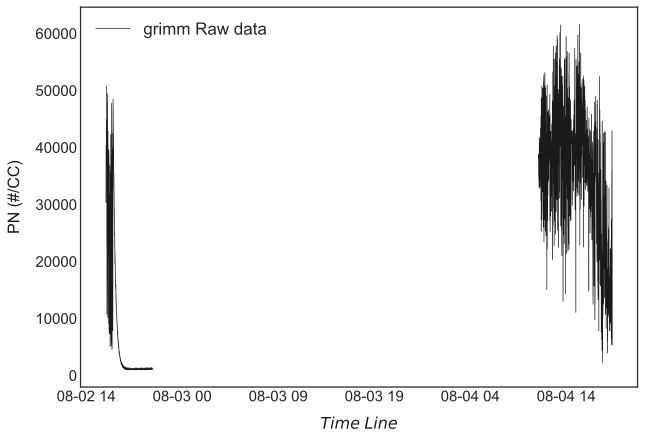

In [14]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.grid(False)


lns1=ax1.plot(df['DateTime'],df['0.3'], color='k',linewidth=0.7,label='grimm Raw data')
#lns2=ax1.plot(x,grimm['0.3n'], color='magenta',linewidth=1.5,label='grimm Filterd data')




lns = lns1
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('PN (#/CC)',color='k',fontsize=16,labelpad=13)
#ax2.set_ylabel('PM 2.5 (ug/m3)',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
#ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))

In [15]:
## Flowing code will solve your problem

In [16]:
from matplotlib.ticker import FuncFormatter

def equidate_ax(fig, ax, dates, fmt="%m-%d %H:%M", label="Date"):  
    N = len(dates)
    def format_date(index, pos):
        index = np.clip(int(index + 0.5), 0, N - 1)
        return dates[index].strftime(fmt)
    ax.xaxis.set_major_formatter(FuncFormatter(format_date))
    ax.set_xlabel(label)
    fig.autofmt_xdate()
    
dates=df['DateTime']
x = np.arange(len(dates))


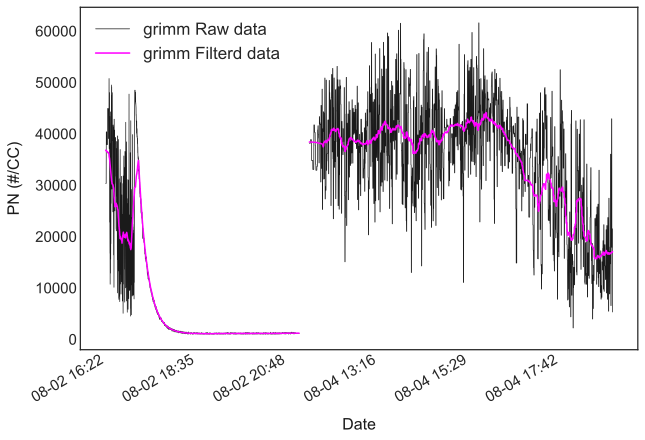

In [17]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.grid(False)


lns1=ax1.plot(x,df['0.3'], color='k',linewidth=0.7,label='grimm Raw data')
lns2=ax1.plot(x,df['0.3ng'], color='magenta',linewidth=1.5,label='grimm Filterd data')




lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('PN (#/CC)',color='k',fontsize=16,labelpad=13)
#ax2.set_ylabel('PM 2.5 (ug/m3)',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
#ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))

equidate_ax(fig, ax1, dates)

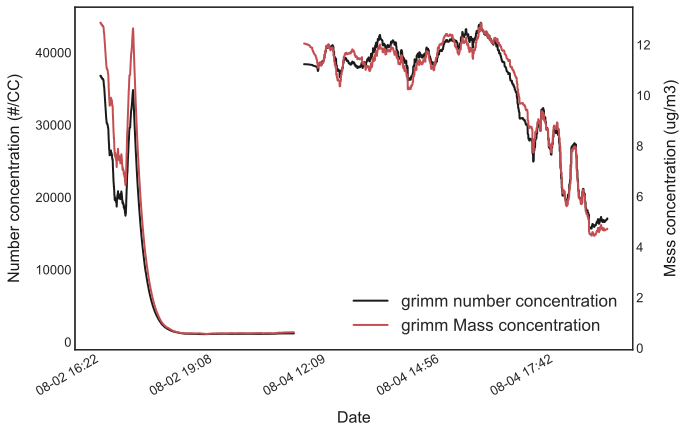

In [18]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax2=ax1.twinx()
ax1.grid(False)
ax2.grid(False)


lns1=ax1.plot(x,df['0.3ng'], color='k',linewidth=2,label='grimm number concentration')
lns2=ax2.plot(x,df['pm2.5ng'], color='r',linewidth=2,label='grimm Mass concentration')




lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='lower right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Number concentration (#/CC)',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('Msss concentration (ug/m3)',color='k',fontsize=16,labelpad=13)



ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(45))

#ax2.fill_between(grimm['DateTime'], grimm['0.3'],color='magenta',alpha=.5)



myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)
equidate_ax(fig, ax1, dates)

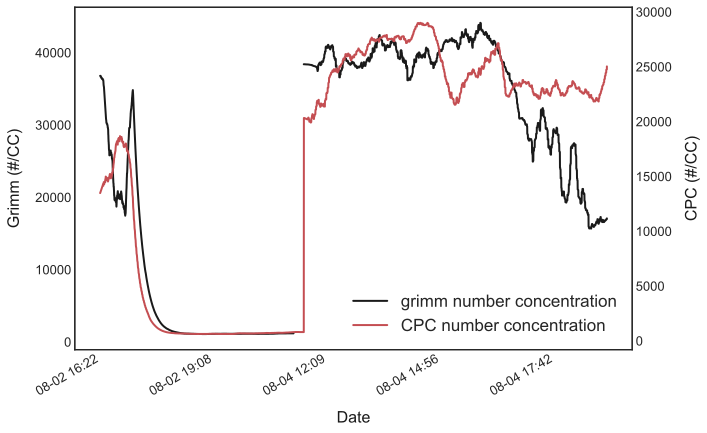

In [19]:


fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax2=ax1.twinx()
ax1.grid(False)
ax2.grid(False)


lns1=ax1.plot(x,df['0.3ng'], color='k',linewidth=2,label='grimm number concentration')
lns2=ax2.plot(x,df['pnn'], color='r',linewidth=2,label='CPC number concentration')




lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='lower right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Grimm (#/CC)',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('CPC (#/CC)',color='k',fontsize=16,labelpad=13)



ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(45))

#ax2.fill_between(grimm['DateTime'], grimm['0.3'],color='magenta',alpha=.5)



myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

equidate_ax(fig, ax1, dates)

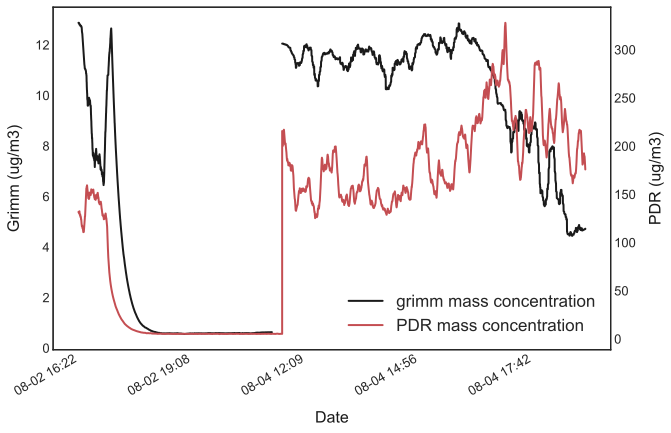

In [20]:



fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax2=ax1.twinx()
ax1.grid(False)
ax2.grid(False)


lns1=ax1.plot(x,df['pm2.5ng'], color='k',linewidth=2,label='grimm mass concentration')
lns2=ax2.plot(x,df['pm2.5np'], color='r',linewidth=2,label='PDR mass concentration')




lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='lower right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Grimm (ug/m3)',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('PDR (ug/m3)',color='k',fontsize=16,labelpad=13)



ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(45))

#ax2.fill_between(grimm['DateTime'], grimm['0.3'],color='magenta',alpha=.5)


equidate_ax(fig, ax1, dates)
